<a href="https://colab.research.google.com/github/hecescam/IA3/blob/main/ML_Exercise_solved_Quique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

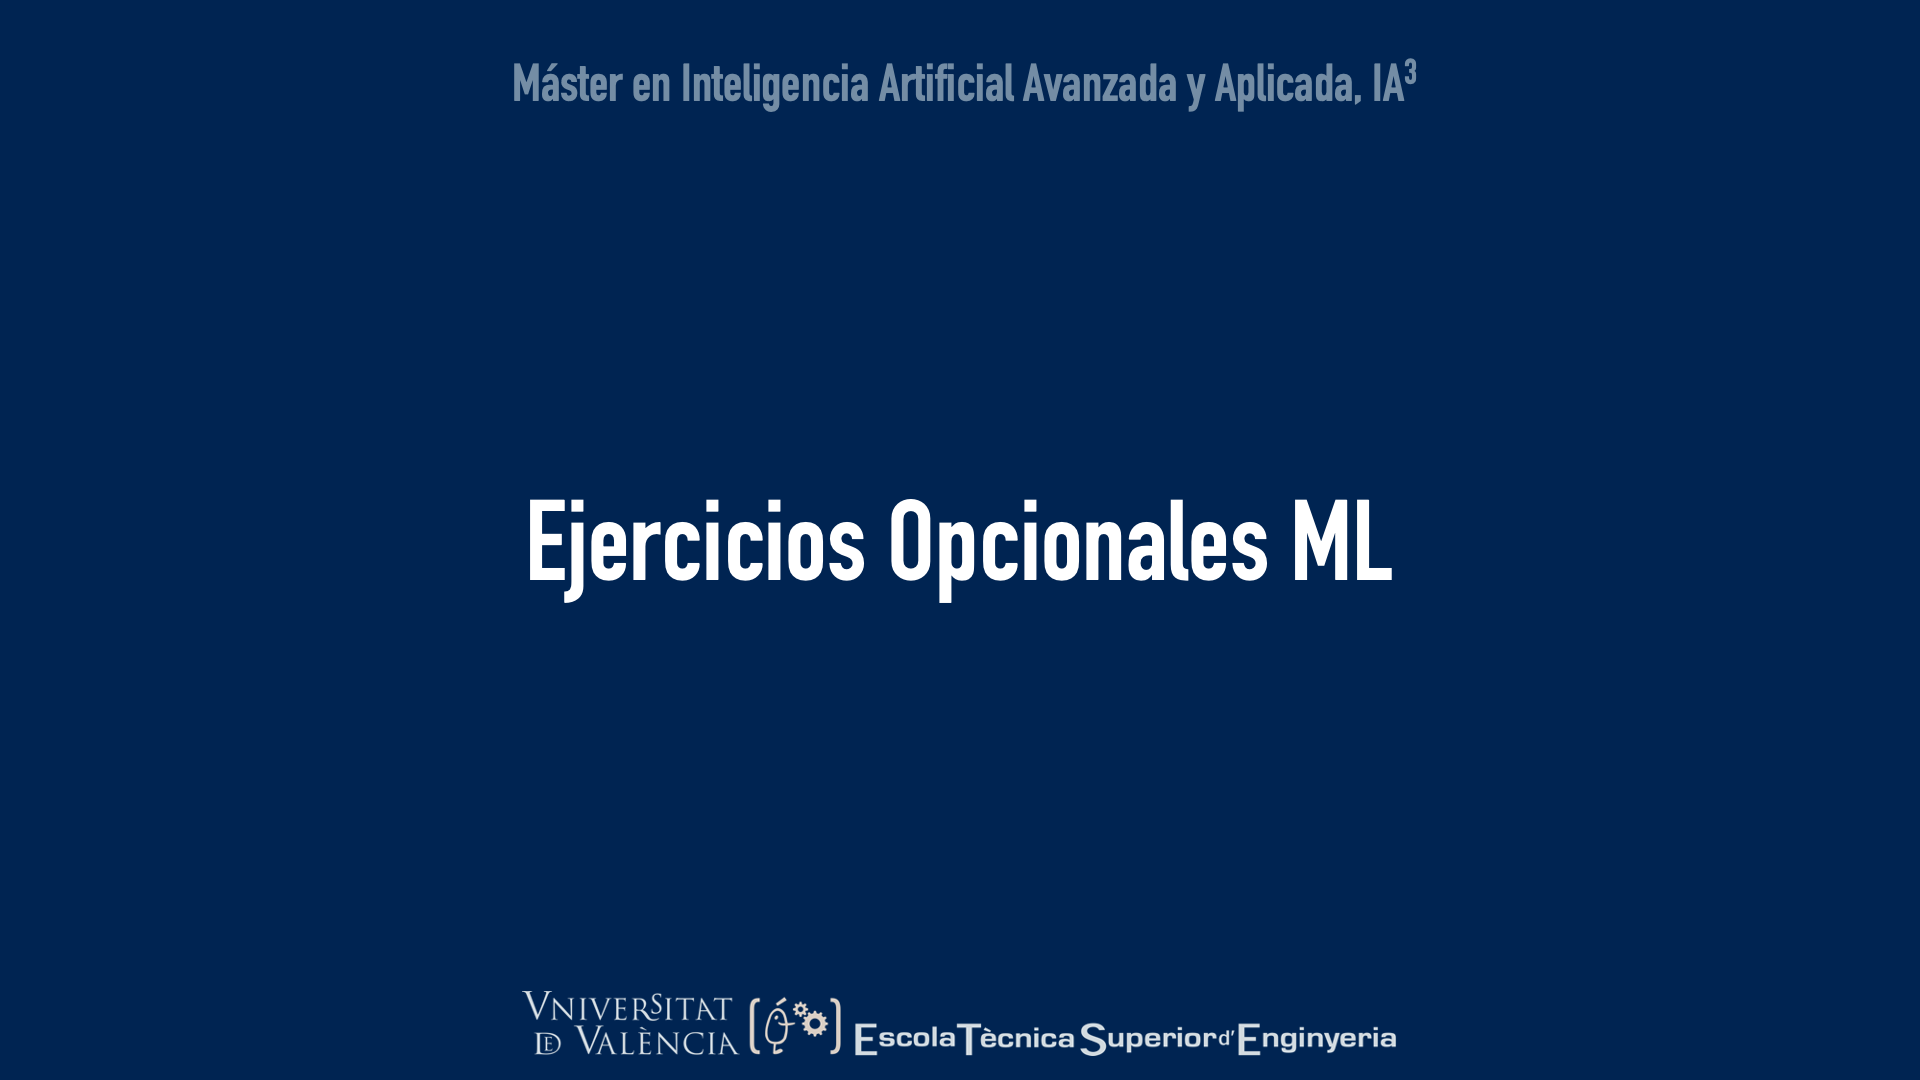

Hello again guys from IDAL IA3 Master Program. To continue with our experience in ML I am here to propose you two different exercises in order to keep progressing. As before, these two exercises are optional and will only increase your score on this mmodule, feel free to do one, both or none of them. The submission should follow the same rules as in the Batmobile exercise. Send me a link to your collaboratory notebook and keep the same groups as before.

# Exercise 01 - 1 Point:

For this exercise I propose you to draw a flow diagram on how to learn on how to use an algorithm, train and evaluate it.

As we learnt in the class this process should contain a block on understanding how this algorithm learn, a block on how to train it including hyperparameters and one block on how you will evaluate and iterate to tune the hyperparameters.

The idea behind this exercise is that visualizing these ideas it will help you create your own framework to work in ML.

Just draw the diagram using diagram.io and upload it to the notebook.

# Exercise 02 - 2 Points:

Now that you have your own framework to work using ML, I propose you to solve the same classification exercise of the pinguins dataset using one of the follow algorithms:

- Logistic Regressions - https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148#:~:text=Logistic%20Regression%20is%20a%20Machine,on%20the%20concept%20of%20probability.&text=The%20hypothesis%20of%20logistic%20regression,function%20between%200%20and%201%20.
- Naive Bayes - https://towardsdatascience.com/naive-bayes-classifier-explained-50f9723571ed#:~:text=Naive%20Bayes%20is%20a%20supervised,prediction%20on%20a%20target%20variable.
- Support Vector Machines (This one is specially difficult to understand and use) - https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989#:~:text=SVM%20or%20Support%20Vector%20Machine,separates%20the%20data%20into%20classes.

Please choose one of the previous algorithms, do the classification exercise and include a small summary of how the algorithm performs against the decission tree and which hyperparameters you should to tune and why.

In [ ]:
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
dataset = sns.load_dataset("penguins")
dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
dataset.shape

(344, 7)

#### STATISTICAL OVERVIEW ANALYSIS

In [ ]:
dataset.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


#### MISSING VALUES ANALYSIS

In [ ]:
dataset.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
dataset = dataset.dropna(subset = ["sex"], axis = 0)

In [ ]:
dataset.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

#### TARGET VARIABLE DISTRIBUTION (CLASS BALANCE ANALYSIS)

In [ ]:
sns.set_theme(style="darkgrid")

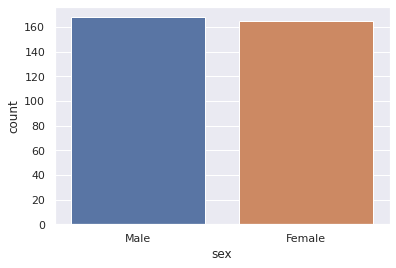

In [ ]:
sns.countplot(x = "sex", data = dataset)

####NUMERIC VARIABLES EXPLORATORY ANALYSIS (OUTLIERS)


In [ ]:
numericVariables = list(dataset.dtypes[dataset.dtypes != object].index)
print(numericVariables)

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


In [ ]:
fig = make_subplots(rows=2, cols=2)
fig.append_trace(go.Box(y = np.array(dataset[numericVariables[0]]),boxpoints='all', name=numericVariables[0]), row = 1, col = 1)
fig.append_trace(go.Box(y = np.array(dataset[numericVariables[1]]),boxpoints='all',name=numericVariables[1]), row = 1, col = 2)
fig.append_trace(go.Box(y = np.array(dataset[numericVariables[2]]),boxpoints='all',name=numericVariables[2]), row = 2, col = 1)
fig.append_trace(go.Box(y = np.array(dataset[numericVariables[3]]),boxpoints='all',name=numericVariables[3]), row = 2, col = 2)
fig.update_layout(title_text="OUTLIER ANALYSIS")
fig.show()

In [ ]:
fig = make_subplots(rows=2, cols=2)
fig.append_trace(go.Box(x = np.array(dataset["sex"]), y = np.array(dataset[numericVariables[0]]),boxpoints='all',name=numericVariables[1]), row = 1, col = 1)
fig.append_trace(go.Box(x = np.array(dataset["sex"]), y = np.array(dataset[numericVariables[1]]),boxpoints='all',name=numericVariables[1]), row = 1, col = 2)
fig.append_trace(go.Box(x = np.array(dataset["sex"]), y = np.array(dataset[numericVariables[2]]),boxpoints='all',name=numericVariables[1]), row = 2, col = 1)
fig.append_trace(go.Box(x = np.array(dataset["sex"]), y = np.array(dataset[numericVariables[3]]),boxpoints='all',name=numericVariables[1]), row = 2, col = 2)
fig.update_layout(title_text="OUTLIER ANALYSIS")
fig.show()

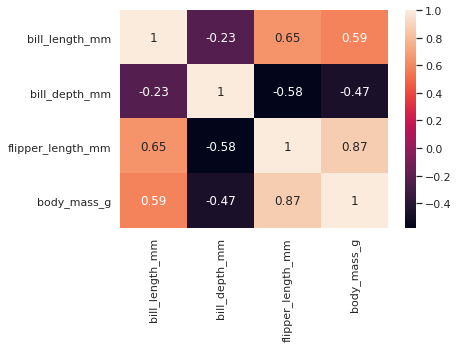

In [ ]:
corrMatrix = dataset.corr()
sns.heatmap(corrMatrix, annot=True)

#### CATEGORICAL VARIABLES ANALYSIS

In [ ]:
categoricalVariables = list(dataset.dtypes[dataset.dtypes == object].index)
print(categoricalVariables)

['species', 'island', 'sex']


#### ONE HOT ENCODING TRANSFORMATION

In [ ]:
dataset['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [ ]:
dataset['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
one_hot_dataset = pd.get_dummies(dataset)

In [ ]:
one_hot_dataset.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1


In [ ]:
one_hot_dataset = one_hot_dataset.drop(columns = ["species_Gentoo","island_Torgersen","sex_Male"],axis = 1).rename(columns = {"sex_Female":"sex"})

In [ ]:
one_hot_dataset.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,island_Biscoe,island_Dream,sex
0,39.1,18.7,181.0,3750.0,1,0,0,0,0
1,39.5,17.4,186.0,3800.0,1,0,0,0,1
2,40.3,18.0,195.0,3250.0,1,0,0,0,1
4,36.7,19.3,193.0,3450.0,1,0,0,0,1
5,39.3,20.6,190.0,3650.0,1,0,0,0,0


#### TRAIN TEST SPLIT

In [ ]:
X = one_hot_dataset.drop(columns = ["sex"], axis = 1)
y = one_hot_dataset["sex"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

#### MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns) 

In [ ]:
X_train_scaled.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,island_Biscoe,island_Dream
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,0.428732,0.461322,0.500982,0.457658,0.442060,0.163090,0.527897,0.326180
std,0.194175,0.233656,0.243020,0.243588,0.497701,0.370243,0.500296,0.469823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272727,0.273810,0.305085,0.268657,0.000000,0.000000,0.000000,0.000000
50%,0.450909,0.476190,0.440678,0.402985,0.000000,0.000000,1.000000,0.000000
75%,0.592727,0.654762,0.711864,0.626866,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns) 

#### LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix


In [ ]:
max_iters = 150

train_accuracy = []
test_accuracy = []
list_iteration = []
f1_train = []
f1_test = []

for x in range(1,max_iters,5):
    list_iteration.append(x)
    logReg = LogisticRegression(solver="liblinear",penalty='l1',max_iter=x)
    logReg.fit(X_train_scaled, y_train)
    
    #Predict train
    y_predict_train = logReg.predict(X_train_scaled)
    f1_train.append(f1_score(y_train, y_predict_train, average='weighted'))
    train_accuracy.append(accuracy_score(y_train, y_predict_train))
    

    #Predict test
    y_predict_test = logReg.predict(X_test_scaled)
    f1_test.append(f1_score(y_test, y_predict_test, average='weighted'))
    test_accuracy.append(accuracy_score(y_test, y_predict_test))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Li

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list_iteration, y=train_accuracy,mode='lines',name='Train Accuracy'))
fig.add_trace(go.Scatter(x=list_iteration, y=test_accuracy,mode='lines',name='Test Accuracy'))
fig.add_trace(go.Scatter(x=list_iteration, y=f1_train,mode='lines',name='F1 Train'))
fig.add_trace(go.Scatter(x=list_iteration, y=f1_test,mode='lines',name='F1 Test'))
fig.show()

In [ ]:
logReg = LogisticRegression(solver="liblinear",penalty='l1',max_iter=11)
logReg.fit(X_train_scaled, y_train)

y_predict_train = logReg.predict(X_train_scaled)
y_predict_test = logReg.predict(X_test_scaled)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [ ]:
confusion_matrix(y_train, y_predict_train)

array([[100,  12],
       [ 11, 110]])

In [ ]:
confusion_matrix(y_test, y_predict_test)

array([[52,  4],
       [ 5, 39]])

#### SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
parameters = {'kernel':['linear','poly','rbf','sigmoid']}

In [ ]:
gridsearch = GridSearchCV(svc,parameters, cv=7)

In [ ]:
gridsearch.fit(X_train_scaled,y_train)

GridSearchCV(cv=7, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
gridsearch

GridSearchCV(cv=7, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_predict_train= gridsearch.best_estimator_.predict(X_train_scaled)
y_predict_test= gridsearch.best_estimator_.predict(X_test_scaled)

In [ ]:
print(f"f1 score (weighted) for training set: {f1_score(y_train, y_predict_train, average='weighted')}")
print(f"f1 score (weighted) for test set: {f1_score(y_test, y_predict_test, average='weighted')}")
print("")
print(f"Accuracy score for training set: {accuracy_score(y_train, y_predict_train)}")
print(f"Accuracy score for test set: {accuracy_score(y_test, y_predict_test)}")


f1 score (weighted) for training set: 0.9227154051962327
f1 score (weighted) for test set: 0.9300779431116508

Accuracy score for training set: 0.9227467811158798
Accuracy score for test set: 0.93
